# An Investigation into a TMDB Data Set

><b>By Mathew Alton</b><br/>
>Data set used: TMDB database (tmdb-movies.csv)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#changelog1"><b>Changelog 1</b></a></li>
<li><a href="#changelog2"><b>Changelog 2</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, we shall be analyzing the TMDB database in an attempt to answer four tentative research questions:
><ol>
    <li><b>Has film revenue increased over time?</b></li> 
    <li><b>Does a larger film budget result in higher revenue?</b></li> 
    <li><b>What are the most popular film genres per decade?</b></li> 
    <li><b>Have average review scores improved over time?</b></li>
 </ol>
 
We will begin this process by first cleaning the raw data set--or data wrangling--to ensure that there are no erroneous values that may adversely affect our analysis.

<a id='wrangling'></a>
## Data Wrangling

To begin with, we're going to import a total of three packages to help us analyze and visualize our data. These three packages are:

><ul>
  <li><a href="http://www.numpy.org/">NumPy</a> - a library consisting of various mathematical functions</li> 
  <li><a href="https://pandas.pydata.org/">Pandas</a> - for data manipulation and analysis using dataframes</li> 
  <li><a href="https://matplotlib.org/">Matplotlib</a> - allows for data to be plotted into a variety of different charts</li> 
 </ul>
 
We can import these packages into our Python environment by using the <b>import</b> command. Furthermore, by expressing the <b>as</b> keyword we can reference the module throughout our code with a shortcut of our choice.

><ul style="list-style-type:none">
  <li>numpy <b>as</b> numpy</li>
  <li>pandas <b>as</b> pd</li>
  <li>matplotlib.pyplot <b>as</b> plt</li>
 </ul>
 
Additionally, we can leverage the <b>% matplotlib inline</b> magic function so that charts appear inline with the rest of our  analysis (<a href="http://ipython.readthedocs.io/en/stable/interactive/plotting.html">when using IPython</a>).

><ul style="list-style-type:none">
    <li><b>% matplotlib inline</b></li>
 </ul>

Finally, to ensure that the dataframe output for columns aren't truncated when using functions such as head(), an additional line of code had been added to bypass the system default.

><ul style="list-style-type:none">
    <li><b>pd.set_option('display.max_columns', 30)</b></li>
 </ul>

These points are expressed in the code below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 30)

% matplotlib inline

After importing these three packages into our Python environment, we can use Pandas (pd) to import a comma separated value database file (.csv) and convert it into a dataframe for our analysis.

Our process will be as follows:

><ol>
    <li>We shall define a variable called <b>df_raw</b> which shall contain a raw, unedited, dataframe derived from a .csv file.</li> 
  <li>We shall then use the <b>pd.read_csv()</b> function to import a movie database ('tmdb-movies.csv') into the <b>df_raw</b> variable. </li> 
    <li>Finally, we shall use the <b>info()</b> function to get a cursory overview of the new dataframe's contents. </li> 
 </ol>
 
 These steps are expressed in the code below:

In [2]:
df_raw = pd.read_csv('tmdb-movies.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the output of <b>df_raw.info()</b>, we can deduce the following:

><ul>
  <li>There are a total of 21 columns in the data set.</li> 
  <li>There are a total of 10866 unique rows.</li> 
 </ul>
 
It is also clear that the values of 9 columns do not add up to 10866; these must contain missing values. These columns are:

><ul>
  <li>imdb_id</li> 
  <li>cast</li>
  <li>homepage</li> 
  <li>director</li>
  <li>tagline</li>
  <li>keywords</li>
  <li>overview</li>
  <li>genres</li>
  <li>production_companies</li> 
 </ul>
 
To explore the raw dataframe in more granular detail, we can use the <b>head()</b> function to see what some of the values in these rows look like, and make a determination as to whether we need them for our analysis.

><ul style="list-style-type:none">
    <li><b>df_raw.head()</b></li>
 </ul>

These steps are expressed in the code below, with df_raw.head(<b>2</b>) outputting just two rows for brevity.

In [3]:
df_raw.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Looking at the kind of data contained in each row, the following observations can be made:

><ul>
  <li>id - can be used to uniquely identify each row. <font color="green"><b>Keep</b></font></li>
  <li>imdb_id - can be dropped; this ID is specific to IMDB's database. <font color="red"><b>Drop</b></font></li> 
  <li>popularity - it's not clear how popularity is measured, but it's complete and *might* come in useful.<font color="green"><b>Keep</b></font></li>
  <li>budget - pertains to a key question in the analysis. <font color="green"><b>Keep</b></font> </li>
  <li>revenue - pertains to a key question in the analysis. <font color="green"><b>Keep</b></font> </li>
  <li>original_title - can be used for ID purposes. <font color="green"><b>Keep</b></font> </li>
  <li>cast - interesting data, but the format needs to change to make analysis easier. <font color="orange"><b>Modify</b></font> </li>
  <li>homepage - only 2936 records, and not pertinent to analysis. <font color="red"><b>Drop</b></font></li> 
  <li>director - potentially interesting metric to gauge film popularity. <font color="green"><b>Keep</b></font></li>
  <li>tagline - could have been interesting for marketing analysis, but there's only 8042 records. <font color="red"><b>Drop</b></font> </li>
  <li>keywords - potentially interesting data, but there are only 9373 records. <font color="red"><b>Drop</b></font></li>
  <li>overview - excessive qualitative information that would be hard to analyse. <font color="red"><b>Drop</b></font></li>
  <li>runtime - potentially interesting metric to gauge film popularity. <font color="green"><b>Keep</b></font></li>
  <li>genres - interesting data, but the format needs to change to make analysis easier. <font color="orange"><b>Modify</b></font></li>
  <li>production_companies - potentially interesting data, but there are only 9836 records. <font color="red"><b>Drop</b></font></li> 
  <li>release_date - could be useful for quarterly revenue analysis (by month). <font color="green"><b>Keep</b></font></li>
  <li>vote count - could be useful to validate vote average. <font color="green"><b>Keep</b></font></li>
  <li>vote_average - potentially interesting metric to gauge film popularity. <font color="green"><b>Keep</b></font></li>
  <li>release_year - pertains to a key question in the analysis. <font color="green"><b>Keep</b></font> </li>
  <li>budget_adj - pertains to a key question in the analysis. <font color="green"><b>Keep</b></font> </li>
  <li>revenue_adj - pertains to a key question in the analysis. <font color="green"><b>Keep</b></font> </li>
 </ul>
 
To ensure that our dataframe is only populated with the columns that we need, we can define a new variable that will contain a dataframe with records marked as <font color="green"><b>Keep</b></font> above.

><ul style="list-style-type:none">
  <li><b>df</b> - the variable that will contain our filtered dataframe.</li>
  <li><b>pd.read_csv(usecols=[*col_1*])</b> - loads a .csv file into the dataframe with specified column names.</li>
  <li><b>parse_dates=['release_date']</b> - ensures that all dates in this column are formatted the same.</li>
  <li><b>index_col=['id']</b> - uses the values of the id column as the index.</li>  
 </ul>
 
 These steps are expressed in the code below:

In [4]:
df = pd.read_csv('tmdb-movies.csv', usecols=['id',
                                             'popularity',
                                             'budget',
                                             'revenue',
                                             'original_title',
                                             'cast',
                                             'director',
                                             'runtime',
                                             'genres',
                                             'release_date',
                                             'vote_count',
                                             'vote_average',
                                             'release_year',
                                             'budget_adj',
                                             'revenue_adj'],
                                    parse_dates=['release_date'],
                                    index_col='id')

To ensure that the new dataframe has been created successfully, we can run the <b>info()</b> and <b>head()</b> functions, as expressed below:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 14 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.2+ MB


In [6]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


By using the following expression, we can also identify whether any null values remain in our dataframe:

><ul style="list-style-type:none">
    <li><b>df.isnull().sum()</b></li>
 </ul>

In [7]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

From the output above, we can see that there are three columns that still contain null values:

><ul>
  <li><b>cast</b></li>
  <li><b>director</b></li>
  <li><b>genres</b></li>
 </ul>
 
To determine whether these null values will be problematic to our analysis, we can view the null records within the dataframe using the following expression:

><ul style="list-style-type:none">
  <li><b>df [ pd.isnull (df ['*col_1*'] ) ]</b></li>
 </ul>

The steps involved with taking a deeper look into the null columns of cast, director, and genres, are expressed below:

In [8]:
# credit to: https://stackoverflow.com/questions/21202652/getting-all-rows-with-nan-value

df[pd.isnull(df['cast'])]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,2015-11-25,47,6.9,2015,0.000000e+00,0.000000e+00
355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,2015-10-09,37,8.2,2015,0.000000e+00,0.000000e+00
321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,2015-01-24,19,7.8,2015,0.000000e+00,0.000000e+00
333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,2015-10-08,12,8.0,2015,0.000000e+00,0.000000e+00
224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,2015-01-01,11,8.9,2015,0.000000e+00,0.000000e+00
319091,0.062536,0,0,The Hunting Ground,NaN,Kirby Dick,103,Documentary,2015-02-27,39,7.8,2015,0.000000e+00,0.000000e+00
332479,0.047256,0,0,Star Wars: TIE Fighter,NaN,Paul Johnson,7,Science Fiction|Action|Animation,2015-03-24,29,7.6,2015,0.000000e+00,0.000000e+00
361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,2015-10-06,13,5.0,2015,0.000000e+00,0.000000e+00
169607,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,83,Documentary,2014-03-28,70,7.8,2014,0.000000e+00,1.384967e+06


In [9]:
df[pd.isnull(df['genres'])]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,2015-10-29,21,6.1,2015,0.00000,0.0
361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,2015-10-06,13,5.0,2015,0.00000,0.0
287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,2014-10-03,13,6.8,2014,0.00000,0.0
21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2009-02-27,57,7.4,2009,0.00000,0.0
40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2009-02-27,11,7.0,2009,0.00000,0.0
127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,2010-06-05,12,5.8,2010,0.00000,0.0
315620,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,2010-12-25,11,7.7,2010,0.00000,0.0
57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,2001-02-02,12,7.2,2001,0.00000,0.0
54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,2008-08-13,11,6.1,2008,0.00000,0.0


In [10]:
df[pd.isnull(df['director'])]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,2015-01-23,14,6.6,2015,0.000000e+00,0.000000e+00
355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,2015-08-10,12,7.5,2015,0.000000e+00,0.000000e+00
321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,2015-01-24,14,6.5,2015,0.000000e+00,0.000000e+00
259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,2014-03-18,32,6.3,2014,0.000000e+00,0.000000e+00
253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,2014-01-19,11,7.2,2014,0.000000e+00,0.000000e+00
256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,2014-03-19,40,7.0,2014,1.381637e+05,0.000000e+00
296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,2014-01-01,18,5.7,2014,0.000000e+00,0.000000e+00
301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,2014-11-17,12,6.8,2014,0.000000e+00,0.000000e+00
133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,2009-01-09,19,7.5,2009,0.000000e+00,0.000000e+00


Though these three columns do contain a number of null values, they aren't numerical and shouldn't affect quantitative analysis. Furthermore, they might be useful when looking at factors that contribute to the most successful/popular films; <b>the null values only seem to affect filsm that are very niche.</b>

With this said, there is still an outstanding issue with the <b>cast</b> and <b>genres</b> columns; <b>they have multiple values per cell that are separated by a pipe ( | ).</b>

To rectify this, we can use the <b>str.split()</b> function to separate string values between the pipe symbol.

><ul style="list-style-type:none">
  <li><b>lead_actor</b> - the variable where we'll store the first cast member value.</li>
  <li><b>supporting_actor</b> - the variable where we'll store the second cast member value.</li>
  <li><b>df.cast.str.split('|')</b> - the expression used to separate values between the pipe symbol.</li>
  <li><b>str[0/1]</b> - identifies the location (in memory) of the cell's string value.</li>
 </ul>
 
 These steps are expressed in the code below:

In [11]:
# credit to: https://stackoverflow.com/questions/32425334/splitting-a-string-in-a-python-dataframe

# stores the name of the first (lead) actor from the 'cast' cell
lead_actor = df.cast.str.split('|').str[0]

# stores the name of the second (supporting) actor from the 'cast' cell
supporting_actor = df.cast.str.split('|').str[1]

Now that two new variables that store the first and second cast member's names have been created, we can <b>append</b> them to dataframe using the code expressed below:

In [12]:
# appends a new 'lead_actor' column to the dataframe using the 'lead_actor' variable
df['lead_actor'] = lead_actor

# appends a new 'supporting_actor' column to the dataframe using the 'supporting_actor' variable
df['supporting_actor'] = supporting_actor

#df.head() can be used to identify whether the values now exist in the dataframe
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor
id,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron


We can perform the same operation on the <b>genres</b> column using the same code as above (with <b>genres</b> in place of <b>cast</b>): 

In [13]:
# stores the name of the (first/second/third/fouth) genre from the 'genres' cell
genre_1 = df.genres.str.split('|').str[0]
genre_2 = df.genres.str.split('|').str[1]
genre_3 = df.genres.str.split('|').str[2]
genre_4 = df.genres.str.split('|').str[3]

# appends a new 'genre_1/2/3/4' column to the dataframe using the 'genre_1/2/3/4' variables
df['genre_1'] = genre_1
df['genre_2'] = genre_2
df['genre_3'] = genre_3
df['genre_4'] = genre_4

# confirms that the new columns and values have been added to the existing dataframe
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,genre_1,genre_2,genre_3,genre_4
id,,,,,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Action,Adventure,Science Fiction,Thriller
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Action,Adventure,Science Fiction,Thriller


Now that the values within both the cast and genres cells have been expanded into their own distinct columns, we no longer require the original cast and genres columns to be included in the dataframe.

To remove these 2 columns from the dataframe, we can utilize the <b>drop()</b> function (with additional parameters) to quickly and effectively remove them:

><ul style="list-style-type:none">
  <li><b>df.drop(['cast', 'genres'])</b> - the columns to be dropped from the dataframe.</li>
  <li><b>axis = 1</b> - an optional parameter that instructs the code to drop from the column (1) instead of the index (0).</li>
  <li><b>inplace = True</b> - an optional parameter that allows the dataframe to be modified inline--essential!.</li>
 </ul>

In [14]:
# inplace should be used when making a modification to a DataFrame, otherwise we could use:
# df = df.drop('cast', axis = 1)

# drop the 'cast' and 'genres' columns from the dataframe, from the column and not the index, inline
df.drop(['cast', 'genres'], axis = 1, inplace=True)

# verify the operation was successful by examining column content
df.head(2)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,genre_1,genre_2,genre_3,genre_4
id,,,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Action,Adventure,Science Fiction,Thriller
76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Action,Adventure,Science Fiction,Thriller


In [15]:
# verify the operation was successful by examining column counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 18 columns):
popularity          10866 non-null float64
budget              10866 non-null int64
revenue             10866 non-null int64
original_title      10866 non-null object
director            10822 non-null object
runtime             10866 non-null int64
release_date        10866 non-null datetime64[ns]
vote_count          10866 non-null int64
vote_average        10866 non-null float64
release_year        10866 non-null int64
budget_adj          10866 non-null float64
revenue_adj         10866 non-null float64
lead_actor          10790 non-null object
supporting_actor    10646 non-null object
genre_1             10843 non-null object
genre_2             8515 non-null object
genre_3             5079 non-null object
genre_4             1981 non-null object
dtypes: datetime64[ns](1), float64(4), int64(5), object(8)
memory usage: 1.6+ MB


Referring to the output above, it is clear that the 2nd, 3rd, and 4th genre columns created previously have significantly lower counts than genre_1. But instead of deleting them from the dataframe outright, we'll retain this information for now in case we want to make a more detailed enquiry into genre popularity later.

By following the data cleaning process outlined above, the dataframe is now in good shape (...) for exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Has film revenue increased over time?

The first question we'll address is whether film revenue has increased over time since the 1970s. We'll proceed by doing a very simple bar plot derived from a customized dataframe that groups <b>release year</b> with yearly average <b>revenue</b>.

The following variables and commands will be utilized for this task:

><ul style="list-style-type:none">
  <li><b>graph_colors</b> - a variable that stores graph colors for consistent formatting.</li>
  <li><b>year_group</b> - a variable that stores a customized dataframe incorporating release year and revenue.</li>
  <li><b>year_group.plot()</b> - an expression that plots a chart with optional parameters.</li> 
 </ul>
 
 The next steps are expressed in the code below:

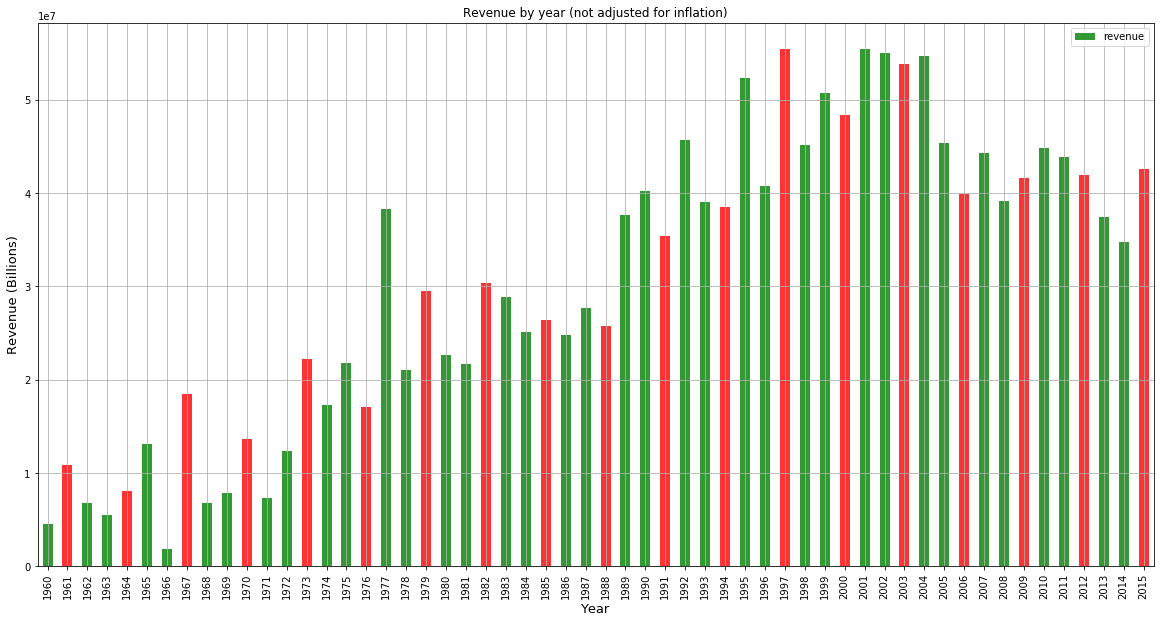

In [16]:
# the variable that stores two graph colors for consistent formatting
graph_colors = ['green', 'red']

# the year_group variable stores a dataframe that groups release_year with average yearly revenue
year_group = df.groupby(['release_year'])['revenue'].mean()

# the following function plot a visual chart withy optional parameters:
# kind = bar chart
# figsize = sets the size of the bar chart
# title: (as below)
# color: uses the graph_colors variable declared above
# alpha: adjusts the transparancy of the bar chart
# grid: set to true for easier visual reference
# legend: displays what variable is being plotted in the upper right
year_group.plot(kind='bar',
                figsize=(20,10),
                title = 'Revenue by year (not adjusted for inflation)',
                color=graph_colors,
                alpha=.8,
                grid=True,
                legend=True)

# this expression sets the label on the x axis
plt.xlabel('Year', fontsize=13)

# while this expression sets the label on the y axis
plt.ylabel('Revenue (Billions)', fontsize=13);

From the chart above it is tempting to make the claim that revenue has increased since the 1970s up to a high around the early 2000s, before fluctuating between high and low values from 2006 onwards.

But there is one important column from the dataframe that should be taken into account for a more realistic perspective: <b>revenue adjusted for inflation</b>; a dollar in 1970 is not the same as a dollar in 2010.

The process of plotting a bar chart for adjusted revenue is expressed in the code below using the <b>revenue_adj</b> column as opposed to <b>revenue</b>.

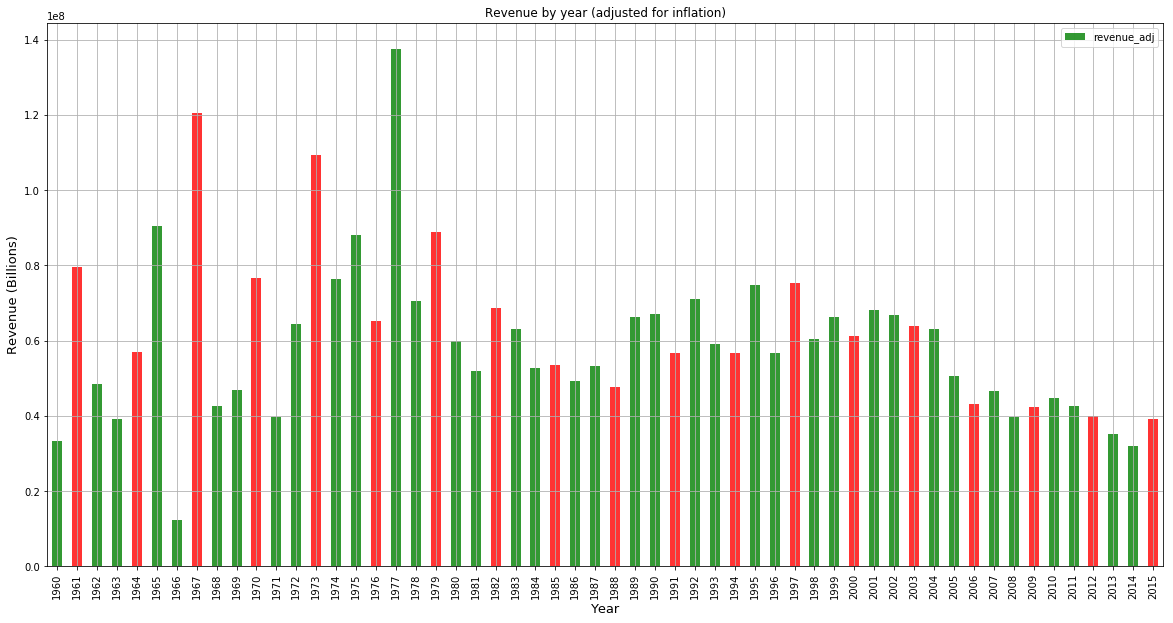

In [17]:
# revenue_adj, adjusted for inflation, is used instead of revenue
year_group = df.groupby(['release_year'])['revenue_adj'].mean()

# because the graph_colors variable was defined previously, it does not need to be run again
year_group.plot(kind='bar',
                figsize=(20,10),
                title = 'Revenue by year (adjusted for inflation)',
                color=graph_colors,
                alpha=.8,
                grid=True,
                legend=True)

# the semicolon (;) at the end suppresses code output
plt.xlabel('Year', fontsize=13)
plt.ylabel('Revenue (Billions)', fontsize=13);

This chart tells a very different story; here the maximum average revenue peaked in 1977, while a gradual decline in average revenue has been going on since 2004. <b>This chart actually suggests average film revenue is decreasing somewhat</b>, but without further investigation it is difficult to suggest possible reasons *why*.

### Research Question 2: Does a larger film budget result in higher revenue?

In order to explore some of the factors that might be affecting average film revenue over time, we can simplify the process by grouping all films that fall within a defined year range (e.g. films from 1970) into a new column in our dataframe.

To achieve this, we will use the following code:

><ul style="list-style-type:none">
  <li><b>bin_edges</b> - a variable that *tags* age ranges.</li>
  <li><b>bin_names</b> - a variable that stores data labels for the values to be entered into bin_edges.</li>
  <li><b>pd.cut(df['*col_1*']</b> - a function that cuts values from a row, to be replaced by values in bin_edges.</li>
 </ul>

In [18]:
# this variable will tag films released in the 1960s onwards
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]

# this variable sets the group labels for each of the tagged films
bin_names = [ '60s', '70s', '80s', '90s', '2000s', '2010s']

# this expression creates a new column by cutting the values from 'release_year'...
# and applying them to the the bin_edge and bin_names variables
df['year_groups'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)

# this function is used to verify that the new column, 'year_groups' has been created
df.head()

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,genre_1,genre_2,genre_3,genre_4,year_groups
id,,,,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Action,Adventure,Science Fiction,Thriller,2010s
76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Action,Adventure,Science Fiction,Thriller,2010s
262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Adventure,Science Fiction,Thriller,NaN,2010s
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Action,Adventure,Science Fiction,Fantasy,2010s
168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Action,Crime,Thriller,NaN,2010s


The result is a new column that lists 6 new categories under the <b>year_groups</b> column:

><ul>
  <li><b>60s</b> - films released between 1960 and 1969.</li>
  <li><b>70s</b> - films released between 1970 and 1979.</li>
  <li><b>80s</b> - films released between 1980 and 1989.</li>
  <li><b>90s</b> - films released between 1990 and 1999.</li>
  <li><b>2000s</b> - films released between 2000 and 2009.</li>
  <li><b>2010s</b> - films released between 2000 and 2015.</li>
 </ul>
 
With these categories available to us, we can now use the <b>groupby()</b> function to collate era-specific films together by average revenue and budget to see whether a higher budget equates to greater returns:

><ul style="list-style-type:none">
  <li><b>mean_rb</b> - a variable that stores a custom dataframe for the mean revenue/budget by year.</li>
  <li><b>groupby()</b> - a function that is used to group revenue and budget by year </li>
  <li><b>mean_rb.plot()</b> - a means to visualize the revenue/budget figures via a chart.</li> 
 </ul>

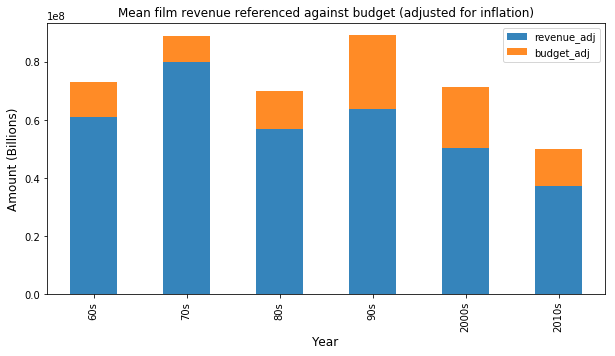

In [19]:
# stores a dataframe into the mean_rb variable
mean_rb = df.groupby('year_groups')['revenue_adj', 'budget_adj'].mean()

# plots the data in a bar chart
mean_rb.plot(kind = 'bar',
           figsize=(10,5),
           title = 'Mean film revenue referenced against budget (adjusted for inflation)',
           alpha=.9,
           stacked = 'True')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (Billions)', fontsize=12);

From this chart, we can see that a higher average budget doesn't necessarily result in a more profitable film; we can see that there was a closer eventuality of 'breaking even' in the 70s, while the 90s was far more divergent.

With this said, there are other factors that need to be taken into consideration before we can attest to this chart's credibility i.e. how many films were released in a particular decade (and will that throw the figures off)? We can answer this question using the code below:

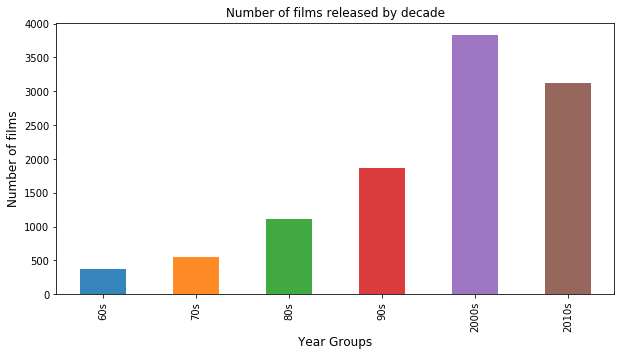

In [20]:
# filmcount is a variable that stores a customized dataframe that counts original titles by decade
filmcount = df.groupby('year_groups').original_title.count()

# plots the data to a bar chart
filmcount.plot(kind = 'bar',
              figsize=(10,5),
              title = 'Number of films released by decade',
              alpha=.9,)

plt.xlabel('Year Groups', fontsize=12)
plt.ylabel('Number of films', fontsize=12);

As the above chart shows, there were far more films released in the 2000s compared to any other decade, while the films recorded in the 2010s only extend to 2015--suggesting there may be many more films to come before the decade is over. Because there were more films available in the decade of 2000/2010, the average revenues might have been affected as a result.

As an alternative, we could use a fixed amount--the maximum revenue/budget amount for a particular decade--to get a better sense of whether revenues/budgets were higher in a given decade.

The next steps are expressed in the code below:

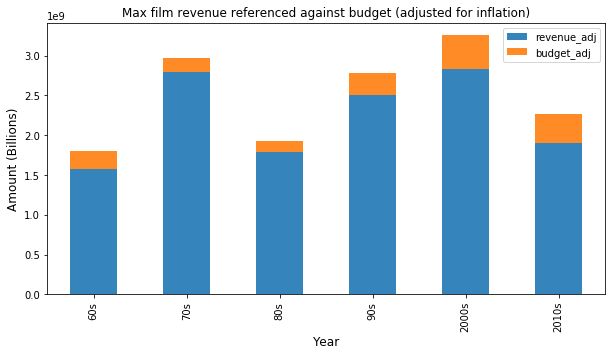

In [21]:
# stores a dataframe into the max_rb variable
max_rb = df.groupby('year_groups')['revenue_adj', 'budget_adj'].max()

# plots the data in a bar chart
max_rb.plot(kind = 'bar',
           figsize=(10,5),
           title = 'Max film revenue referenced against budget (adjusted for inflation)',
           alpha=.9,
           stacked = 'True')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (Billions)', fontsize=12);

This chart, showing the maximum revenue/budget per decade, does share some similarities with the figures in the mean chart, though the maximum revenue/budget in the 2000 decade is significantly higher.

With this said, both the mean and max charts do indicate that <b>higher budgets *may* result in greater revenue; decades where budgets were higher on average/max do seem to have higher revenues as a result</b>.

### Research Question 3: What are the most popular film genres per decade?

Another question of interest relates to the most popular genre of film per decade; determining the kind of film that is most in demand may make it easier to allocate a film budget.

The easiast way to determine which genre is most popular requires only a single command:

><ul style="list-style-type:none">
  <li><b>df.groupby('year_groups')['genre_1'].describe()</b></li>
 </ul>
 
This code is expressed below:

In [22]:
# credit to: https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe

# groups the contents of year_groups and compares them to genre_1
df.groupby('year_groups')['genre_1'].describe()

,count,unique,top,freq
year_groups,,,,
60s,370,19,Drama,78
70s,544,19,Drama,117
80s,1116,19,Comedy,274
90s,1857,20,Comedy,467
2000s,3818,20,Comedy,912
2010s,3106,20,Drama,700


From this output, we can see that <b>Drama was recorded as being the most popular genre in 1960s, 70s, and 2010s</b>; while <b>comedy was recorded as being the most popular genre in the 1980s, 1990s, and 2000s</b>.

To see this information in more granular detail using charts, we can deploy <b>masks</b> to cross reference films from particular decades with the genre they belong to:

><ul>
  <li><b>sixties</b> - a mask for films from the 1960s.</li>
  <li><b>seventies</b> - a mask for films from the 1970s.</li>
  <li><b>eighties</b> - a mask for films from the 1980s.</li>
  <li><b>nineties</b> - a mask for films from the 1990s.</li>
  <li><b>millenium</b> - a mask for films from the 2000s.</li>
  <li><b>millenium1</b> - a mask for films from the 2010s.</li>
 </ul>

The following code demonstrates how masks are created:

In [23]:
# sixties is a variable that contains all films marked '60s' in the year_groups column
sixties = df.year_groups == '60s'

# seventies is a variable that contains all films marked '70s' in the year_groups column
seventies = df.year_groups == '70s'

# eighties is a variable that contains all films marked '80s' in the year_groups column
eighties = df.year_groups == '80s'

# nineties is a variable that contains all films marked '90s' in the year_groups column
nineties = df.year_groups == '90s'

# millenium is a variable that contains all films marked '2000s' in the year_groups column
millenium = df.year_groups == '2000s'

# millenium1 is a variable that contains all films marked '2010s' in the year_groups column
millenium1 = df.year_groups == '2010s'

The following bar chart plots the most popular film genre in the 1960s using the <b>sixties</b> mask outlined above.

This chart suggests that:

><ol>
    <li>Drama</li> 
    <li>Comedy</li> 
    <li>Action </li> 
 </ol>
 
 Were the most popular film genres of the 1960s.

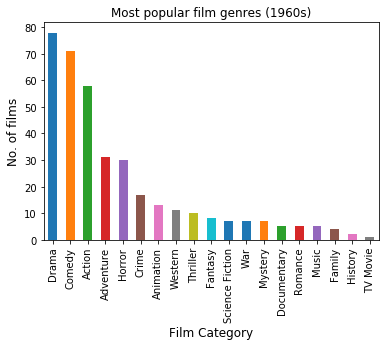

In [24]:
# plot60s - variable that contains value counts for genres from the 60s

plot60s = df.genre_1[sixties].value_counts()
plot60s.plot(kind = 'bar',
             title = 'Most popular film genres (1960s)')

plt.xlabel('Film Category', fontsize=12)
plt.ylabel('No. of films', fontsize=12);

The following bar chart plots the most popular film genre in the 1970s using the <b>seventies</b> mask outlined above.

This chart suggests that:

><ol>
    <li>Drama</li> 
    <li>Comedy</li> 
    <li>Action </li> 
 </ol>
 
 Were the most popular film genres of the 1970s.

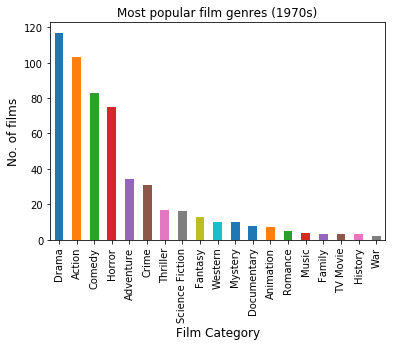

In [25]:
# plot70s - variable that contains value counts for genres from the 70s

plot70s = df.genre_1[seventies].value_counts()
plot70s.plot(kind = 'bar',
             title = 'Most popular film genres (1970s)')

plt.xlabel('Film Category', fontsize=12)
plt.ylabel('No. of films', fontsize=12);

The following bar chart plots the most popular film genre in the 1980s using the <b>eighties</b> mask outlined above.

This chart suggests that:

><ol>
    <li>Drama</li> 
    <li>Action</li> 
    <li>Comedy</li> 
 </ol>
 
 Were the most popular film genres of the 1980s.

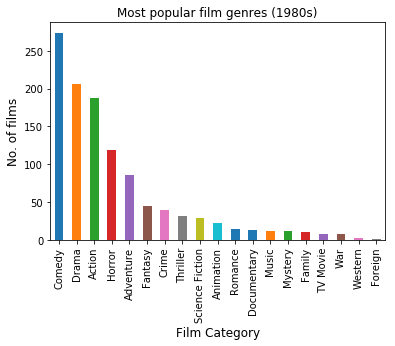

In [26]:
# plot80s - variable that contains value counts for genres from the 80s

plot80s = df.genre_1[eighties].value_counts()
plot80s.plot(kind = 'bar',
             title = 'Most popular film genres (1980s)')

plt.xlabel('Film Category', fontsize=12)
plt.ylabel('No. of films', fontsize=12);

The following bar chart plots the most popular film genre in the 1990s using the <b>nineties</b> mask outlined above.

This chart suggests that:

><ol>
    <li>Comedy</li> 
    <li>Drama</li> 
    <li>Action </li> 
 </ol>
 
 Were the most popular film genres of the 1990s.

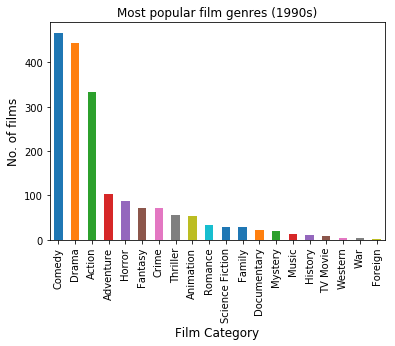

In [27]:
# plot90s - variable that contains value counts for genres from the 90s

plot90s = df.genre_1[nineties].value_counts()
plot90s.plot(kind = 'bar',
             title = 'Most popular film genres (1990s)')

plt.xlabel('Film Category', fontsize=12)
plt.ylabel('No. of films', fontsize=12);

The following bar chart plots the most popular film genre in the 2000s using the <b>millenium</b> mask outlined above.

This chart suggests that:

><ol>
    <li>Comedy</li> 
    <li>Drama</li> 
    <li>Action</li> 
 </ol>
 
 Were the most popular film genres of the 2000s.

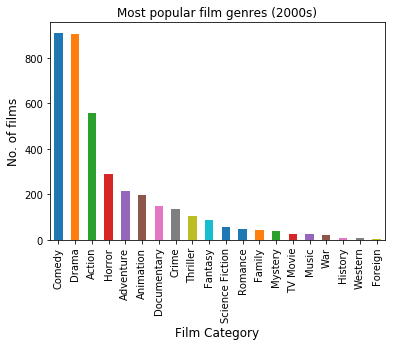

In [28]:
# plotmill - variable that contains value counts for genres from the 2000s

plotmill = df.genre_1[millenium].value_counts()
plotmill.plot(kind = 'bar',
             title = 'Most popular film genres (2000s)')

plt.xlabel('Film Category', fontsize=12)
plt.ylabel('No. of films', fontsize=12);

The following bar chart plots the most popular film genre in the 2010s using the <b>millenium1</b> mask outlined above

This chart suggests that:

><ol>
    <li>Drama</li> 
    <li>Comedy</li> 
    <li>Action </li> 
 </ol>
 
 Were the most popular film genres of the 2010s.

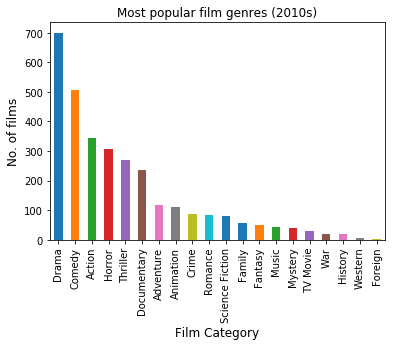

In [29]:
# plotmill1 - variable that contains value counts for genres from the 2010s

plotmill1 = df.genre_1[millenium1].value_counts()
plotmill1.plot(kind = 'bar',
             title = 'Most popular film genres (2010s)')

plt.xlabel('Film Category', fontsize=12)
plt.ylabel('No. of films', fontsize=12);

From the graphs outlined above, it would seem there are three genres that have remained dominant since the 1960s: <b>Drama, Comedy, and Action</b>.

With this said, many films are classfied as belonging to more than one genre e.g. horror/sci-fi, which can make true classification difficult. Regardless, the data at least intimates that these three categories are at the very least popular--and in a sense, timeless.

<a id='changelog1'></a>
### Research Question 4: Have average review scores improved over time?

Another reasonable way of gauging the popularity of film over time is to analyze the average review scores by decade. Review scores are not always indicative of success at the box office, but they can provide an insight into how satisfied cinemagoers are with the films they see over time.

We'll begin this analysis by taking a cursory look over the data available to us in our dataframe:

In [30]:
# review_averages - stores a ataframe grouping the year_groups column with the mean voting average
review_averages = df.groupby('year_groups')['vote_average'].mean()

review_averages

year_groups
60s      6.258221
70s      6.333945
80s      6.063653
90s      5.985376
2000s    5.932444
2010s    5.888896
Name: vote_average, dtype: float64

The output above provides the cumulative average vote score per year, but does not provide an impression as to the spread of different review scores over a series of decades. To better visualize this kind of information, we can use a <b>histogram</b> chart as outlined below:

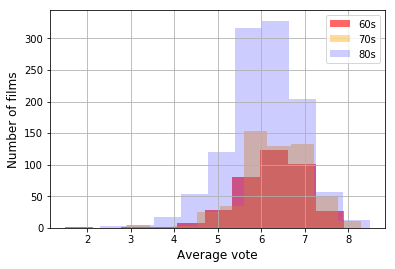

In [31]:
# the decision to use 3 variables per chart was taken so as not to 
# oversaturate the final diagram

# this line of code plots a histogram of the vote average by films from the 60s
# the color is set to red, with an alpha value of .6 for transparancy
df.vote_average[sixties].hist(label = '60s', color=['red'], alpha=.6)

# this line of code plots a histogram of the vote average by films from the 70s
# the color is set to orange, with an alpha value of .4 for transparancy
df.vote_average[seventies].hist(label = '70s', color=['orange'], alpha=.4 )

# this line of code plots a histogram of the vote average by films from the 80s
# the color is set to orange, with an alpha value of .4 for transparancy
df.vote_average[eighties].hist(label = '80s', color=['blue'], alpha=.2)

# adds a legend to the chart, alongside x and y axis labels
plt.legend();
plt.xlabel('Average vote', fontsize=12)
plt.ylabel('Number of films', fontsize=12);

The chart above covers average review scores across the <b>60s, 70s, and 80s.</b>

As we can determine from the above graph, there is a higher concentration of review scores in the eighties with an average score of around 6 out of 10. The histogram also indicates that there were fewer films made in the 60s and 70s, and the averages for the review score in these decades appear to be slightly higher on average as well. But because there are fewer films available in the 60s and 70s, <b>it can be argued that the averages in these decades should be slightly higher by virtue of having a smaller pool of titles to average from</b>.

The next histogram will cover the <b>90s, 2000s, and 2010s:</b>

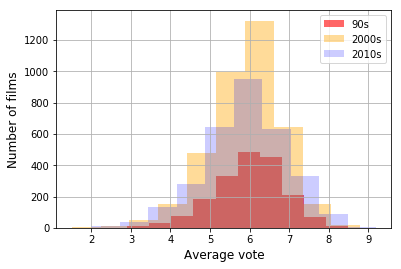

In [32]:
# this line of code plots a histogram of the vote average by films from the 90s
# the color is set to red, with an alpha value of .6 for transparancy
df.vote_average[nineties].hist(label = '90s', color=['red'], alpha=.6)

# this line of code plots a histogram of the vote average by films from the 2000s
# the color is set to orange, with an alpha value of .4 for transparancy
df.vote_average[millenium].hist(label = '2000s', color=['orange'], alpha=.4)

# this line of code plots a histogram of the vote average by films from the 80s
# the color is set to orange, with an alpha value of .2 for transparancy
df.vote_average[millenium1].hist(label = '2010s', color=['blue'], alpha=.2)

# adds a legend to the chart, alongside x and y axis labels
plt.legend();
plt.xlabel('Average vote', fontsize=12)
plt.ylabel('Number of films', fontsize=12);

The chart above covers average review scores across the <b>90s, 2000s, and 2010s.</b>

Unlike the previous histogram that had a total film count hovering around 350 for the 1980s, this histogram demonstrates that <b>far more films have been made in the 90s, 2000s, and 2010s compared to the previous three decades; the total count goes over 1200.</b> 

One potentially interesting observation that can be derived from this histogram is that the 2010s plot is rather symmetrical and averages at about 6/10. It also appears that the 2010s plot goes against a trend that can be observed from the previous three decades and beyond; it is the only decade plot where the number of films has not increased over the previous year.

To be more critical, one could argue that this is because <b>the 2010s have not concluded yet as a full decade; unlike the 2000s plot that covers the years 2000-2010, the 2010s plot only covers 2010-2015 (it's not a full decade).</b>

Comparing the 2 histograms covering all decades, <b>it appears that review score averages have actually lowered slightly over time; hovering around 6-7/10.</b> Arguably, and as noted aboved, this might be attributable to the fact that more films have been made in the 90s, 2000s, and 2010s compared to the previous three decades which suggests that more films have been averaged--which might explain why the scores are slightly lower.

<a id='conclusions'></a>
## Conclusions

The report offered a tentative analysis of the data contained in the TMDB database to answer four research questions:

><ol>
    <li>Has film revenue increased over time?</li> 
    <li>Does a larger film budget result in higher revenue??</li> 
    <li>What are the most popular film genres per decade?</li>
    <li>Have average review scores improved over time?</li>
 </ol>
 
In summary, the following conclusions can be made:
 
###### Q1. Has film revenue increased over time?
 
From the data provided, it seems like the overall amount of film revenue from 2004 onwards (and particularly from 2010) has been on the decline. Arguably, this may be a result of a far more competitive environment for the viewer's attention; streaming media in the home and instantaneous access to web content *may* be having an affect on people's desire to go to the cinema. But without conclusive evidence to prove this, it remains an assumption.

###### Q2. Does a larger film budget result in higher revenue?

Though a higher average budget does appear to have a positive affect on revenue from the graphs created, there are too many extraneous variables to account for to make a conclusive claim: the number of films per year, or a particularly well-received 'one off' mega-hit can influence these metrics significantly.  

###### Q3. What are the most popular film genres per decade?

The data suggests that there are three key genres that compete for the viewer's attention: drama, action, and comedy. But with this said, there are many films that blend genres making it difficult to truly determine whether it is 'pure drama' or 'comedy drama' that populate cinemas.

###### Q4. Have average review scores improved over time?

The histograms produced indicate that average review scores have lowered slightly in the 90s, 2000s, and 2010s compared to the previous three decades. With this said, more films have been produced in the later three decades which might have affected their overall averages.

<a id='changelog2'></a>
## Limitations of the data set

Though relatively robust, the data set provided by TMDB contains some questionable fields and values that suggests it has been populated by third parties (perhaps best indicated by the presence of the <b>imdb_id</b> column below):

In [33]:
#prints the raw data set
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

For a clear example of some questionable fields in the data set, we can refer to the tail end of the dataframe as expressed below:

In [34]:
# prints the last 5 fields in the raw data set
df_raw.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


Here, we can see that there are some *films* that record 0 budget and revenue, <b>which don't show up as null values when doing data cleaning.</b>

A possible (future) approach to rectifying this situation would be to devise a solution that collates all films with 0 revenue and budget before dropping them from a dataset (with caution...).

Below is a column-by-column analysis that identifies further issues with the data set:

><ul>
    <li><b>id</b> - used as an index. <font color="green"><b>No issue</b></font></li>
    <li><b>imdb_id</b> - specific to IMDB's database, which provides little value. <font color="red"><b>Dropped</b></font></li> 
    <li><b>popularity</b> - it's not clear how popularity is measured, which is unfortunate because it might have been an interesting column to cross-reference.<font color="red"><b>Unused</b></font></li>
    <li><b>budget</b> - raw revenue, but potentially misleading as it wasn't adjusted for inflation. Fortunately, said column does exist in this data set. <font color="orange"><b>Caution</b></font> </li>
    <li><b>revenue</b> - as above, not adjusted for inflation. <font color="orange"><b>Caution</b></font> </li>
    <li><b>original_title</b> - used for film ID. <font color="green"><b>No issue</b></font> </li>
    <li><b>cast</b> - the fact that multiple cast members belonged to one cell was indeed problematic; some films had more actors in them than others, so it was hard to determine how many new columns would be needed to accomodate actors for each film. As a compromise, the first (leading) and second (supporting) actors were extracted, but this data should have been input atomically.<font color="orange"><b>Modified</b></font> </li>
    <li><b>homepage</b> - of no use, but easily dropped. <font color="red"><b>Dropped</b></font></li> 
    <li><b>director</b> - this column did contain some empty values, which is unusual because all films must have a director.... <font color="orange"><b>Caution</b></font></li>
    <li><b>tagline</b> - of no use, but easily dropped. <font color="red"><b>Dropped</b></font> </li>
    <li><b>keywords</b> - like the cast column, separating values in a single cell by a pipe (|) symbol just made analysis more difficult. Also contained missing values. <font color="red"><b>Dropped</b></font></li>
    <li><b>overview</b> - of no value, but easily dropped. <font color="red"><b>Dropped</b></font></li>
    <li><b>runtime</b> - potentially interesting metric to gauge film popularity. <font color="green"><b>No issue</b></font></li>
    <li><b>genres</b> - like cast above, this column had values separated by a pipe (|) symbol which made analysis slightly more difficult. Also potentially ambiguous; films can belong to more than one genre, and some films had more than 4... <font color="orange"><b>Caution</b></font></li>
    <li><b>production_companies</b> - many null values, which is unfortunate as it might have been interesting to show which studios were more popular and when. <font color="red"><b>Dropped</b></font></li> 
    <li><b>release_date</b> - initially had different date formats (some were 6/3/1960, others were 06/03/1960) but this was rectified with a simply line of code in the beginning. <font color="green"><b>Keep</b></font></li>
    <li><b>vote count</b> - could be useful to validate vote average. <font color="green"><b>No issues</b></font></li>
    <li><b>vote_average</b> - potentially interesting metric to gauge film popularity. <font color="green"><b>No issues</b></font></li>
    <li><b>release_year</b> - pertains to a key question in the analysis. <font color="green"><b>no issues</b></font> </li>
    <li><b>budget_adj</b> - a more accurate representation of revenue and budget that accounts for inflation--it was very useful to have this colum in the data set. <font color="green"><b>No issue</b></font> </li>
    <li><b>revenue_adj</b> - as above... <font color="green"><b>No issue</b></font> </li>
 </ul>

This concludes the (amended) analysis of the TMDB data set.

### Addendum: What are the highest grossing films of all time?

The code expressed below outputs the top 5 films of all time, sorted by revenue and adjusted for inflation.

In [35]:
df.sort_values(by='revenue_adj', ascending=False)[:5]

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,genre_1,genre_2,genre_3,genre_4,year_groups
id,,,,,,,,,,,,,,,,,,,
19995,9.432768,237000000,2781505847,Avatar,James Cameron,162,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,Sam Worthington,Zoe Saldana,Action,Adventure,Fantasy,Science Fiction,2000s
11,12.037933,11000000,775398007,Star Wars,George Lucas,121,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,Mark Hamill,Harrison Ford,Adventure,Action,Science Fiction,NaN,70s
597,4.355219,200000000,1845034188,Titanic,James Cameron,194,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,Kate Winslet,Leonardo DiCaprio,Drama,Romance,Thriller,NaN,90s
9552,2.010733,8000000,441306145,The Exorcist,William Friedkin,122,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09,Linda Blair,Max von Sydow,Drama,Horror,Thriller,NaN,70s
578,2.563191,7000000,470654000,Jaws,Steven Spielberg,124,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09,Roy Scheider,Robert Shaw,Horror,Thriller,Adventure,NaN,70s
